<a href="https://colab.research.google.com/github/Decollabs/analise_covid_brasil/blob/main/Andre_Brandao_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://globalforum.diaglobal.org/wp-content/uploads/2020/10/rwd-and-rwe-meta.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

# Obtenção dos Dados

##Sobre as fontes utilizada:

Os dados utilizados para realizar este estudo foram obtidos atrvés *Our World in Data* que é um projeto de pesquisa e divulgação que se concentra em apresentar dados e informações sobre uma ampla variedade de tópicos globais, como saúde, educação, pobreza, meio ambiente, economia e muito mais.

O projeto é conhecido por sua abordagem baseada em evidências e pela forma como apresenta tendências e padrões usando dados confiáveis de fontes reconhecidas.

*Our World in Data* é usada por educadores, pesquisadores, jornalistas e pelo público em geral, alguns dos veículos que se baseiam nesta fonte de dados são: *The New York Times*, BBC, revista *Nature*, World *Economic Forum*, dentre outros.

Como o estudo tem seu enfoque no cenário brasileiro, foram utilizados também dados de fontes provenientes do governo federal, como openDataSUS e o próprio conselho naciponal de saúde.

Neste projeto utilizaremos um extenso dataset da *OWID* que contém uma vasta gama de informações sobre o periodo da pandemia da COVID-19, nele encontramos informações sobre as densidades de mortes causadas pela doença, informações derivadas da renda, testagem de pessoas para COVID-19, doenças que podem ser eventualmente correlatas com a COVID-19, expectativa de vida, ocupação de hospitais, dentre outras que derivam das citadas anterirormente.

Além disso, nos *datasets* do governo encontramos dados principalmente sobre ocupação de leitos de UTI e sobre a campanha de vacinação brasileira, que destaca o Brasil internacionalmente justamente por sua eficiencia.

##Sobre os problemas enfrentados durante a realização deste estudo:


Pelo fato do objeto de estudo ser uma doença recente, e portanto, pouco estudada, nos deparamos com alguns problemas extras se comparado ao estudo de um problema notório e conhecido, a propria não familiaridade proporciona a não existencia de palpites iniciais de pontos de partida que de fato nos levem à concluir sobre o tema.

Além disso, tratando-se sobre dados da OWID, pudemos perceber que, embora o *dataset* seja extenso, temos muitos dados faltantes, principalmente sobre o Brasil que é o foco deste estudo.

Sobre os dados obtidos via sites oficiais do governo federal, conclui que além de compartilhar do mesmo problema citado anteriormente, não possuem dicionário de variáveis, oque implica na análise como um todo e agrega imprecisão nos resultados por nao saber extamente a que aqueles dados se referem.

Outro problema dos dados do governo é que apresentam por vezes uma ruptura muito abrupta acerca de uma tendencia que se apresenta, isto passa a impressão de que os dados foram disponibilizados de forma incompleta ou foram perdidos no meio do processo de documentação.

Ainda, existem dados governamentais que se propooe a passar uma mesma informação, mas o fazem de maneira contraditória, causando dúvidas na hora da análise dos mesmos.




### Dicionário de Variáveis:
Por se tratar de um *dataset* muito vasto na sua quantidade de informações (68 diferentes colunas até o presente momento), não deixarei aqui por extenso o dicionário de variáveis, entretanto, conforme se fizer nescessário ao longo do estudo, comentarei sobre o significado das variáveis mais relevantes. Também deixarei aqui o link que leva ao dicionário de variáveis completo deste *dataset* para a consulta do leitor.

Link para o dicinário de variáveis: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv                  

Os dicionários de variáveis referentes às tabelas do CNS e OpenDataSUS não forma disponibilizadas pelo governo, ou não existem.


### Transparência:

 Para ter acesso aos dados utilizados neste estudo você pode entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados disponibilizada pela *Our World in Data* sobre os casos de COVID-19 ao redor do mundo.

 Os arquivos advindos do OpenDataSUS e do CNS podem ser baixados através dos seguintes links:

1.    OpenDataSUS - Registro de ocupação hospitalar: https://opendatasus.saude.gov.br/dataset/registro-de-ocupacao-hospitalar-covid-19/resource/1a1e9932-253f-441b-8d9c-aaf35f3022a0
2.    CNS - Leitos COVID-19: https://infoms.saude.gov.br/extensions/Leitos_C19/Leitos_C19.html
3.    CNS - Vacinômetro: https://infoms.saude.gov.br/extensions/SEIDIGI_DEMAS_Vacina_C19/SEIDIGI_DEMAS_Vacina_C19.html#



In [111]:
# Instalação das bibliotecas usando pip, se necessário(descomentar e executar)
#!pip install pandas matplotlib seaborn gdown

In [112]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import gdown
#pd.set_option('display.max_columns', None) #Permite a visualização de colunas ilimitadas
#pd.set_option('display.max_rows', None) #Permite a visualização de linhas ilimitadas


# importando o dataset COVID-19 para um DataaFrame
DATAPATH = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(DATAPATH)

### Análise Exploratória Inicial

Aqui verificaremos o tamnho da tabela de dados que importamos para tomar consciência do tamanho do problema

In [113]:
#Tamanho do dataset
print('Dimensões da tabela: ', '\nColunas(variáveis): ',df.shape[1], '\nLinhas: ' ,df.shape[0])

#Visualização das 5 primeiras entradas do dataframe
df.head()

Dimensões da tabela:  
Colunas(variáveis):  67 
Linhas:  337732


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [114]:
#Vis ualização do nome de cada coluna
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Detalhe importante quando falamos em dados é saber se todos os dados estão no fomrato adequado para análise.

In [115]:
#Visualização dos tipos de dados presentes na tabela bem como o numero de valores nao nulos por coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337732 entries, 0 to 337731
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    337732 non-null  object 
 1   continent                                   321700 non-null  object 
 2   location                                    337732 non-null  object 
 3   date                                        337732 non-null  object 
 4   total_cases                                 300132 non-null  float64
 5   new_cases                                   328555 non-null  float64
 6   new_cases_smoothed                          327296 non-null  float64
 7   total_deaths                                278839 non-null  float64
 8   new_deaths                                  328611 non-null  float64
 9   new_deaths_smoothed                         327381 non-null  float64
 

Outro detalhe crucial que devemos ficar atentos são os espaços da tabela que foram preenchidos com nenhuma informação(valores ausentes). Na célula abaixo verificamos esta informação em termos de porcentagem.

In [116]:
round((df.isnull().sum()/df.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions                      0.97
weekly_icu_admissions_per_million          0.97
excess_mortality_cumulative_per_million    0.97
excess_mortality                           0.97
excess_mortality_cumulative                0.97
                                           ... 
new_deaths_per_million                     0.03
population                                 0.00
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

Como vimos antes, os dados de data não estão postos no formato adequado(*datetime*), por isso na célula abaixo fazemos a conversão para o formato desejado.

In [117]:
#Convertendo o tipo de dado da coluna 'date' para datetime
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.dtypes.value_counts()
#Observamos uma nova coluna com os dados do tipo datetime64[ns]

float64           62
object             4
datetime64[ns]     1
dtype: int64

Agora vamos verificar quais foram os 5 países que tiveram mais casos confirmados por COVID-19 até a data da última atualização da tabela.

In [118]:
#Verifico qual foi a ultima data de atualização da tabela
print('Ultima data de atualização da tabela: {}' .format(df.date.max()))

Ultima data de atualização da tabela: 2023-08-30 00:00:00


In [119]:
#Ordeno a tabela pela coluna 'total_cases' apenas para dados do dia da última atualização
df.loc[df['date'] == '2023-08-09'].sort_values(by = 'total_cases', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
333702,OWID_WRL,NaN,World,2023-08-09,769478849.0,3254.0,18332.571,6955246.0,27.0,58.143,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
129483,OWID_HIC,NaN,High income,2023-08-09,424255659.0,2825.0,16897.429,2898956.0,26.0,39.143,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
17348,OWID_ASI,NaN,Asia,2023-08-09,299638251.0,536.0,13043.286,1632690.0,3.0,11.571,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
94747,OWID_EUR,NaN,Europe,2023-08-09,249086187.0,2713.0,3796.714,2075310.0,24.0,31.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
321815,OWID_UMC,NaN,Upper middle income,2023-08-09,244243373.0,255.0,1093.286,2665587.0,1.0,14.143,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218417,PRK,Asia,North Korea,2023-08-09,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,13.200,72.27,NaN,2.606942e+07,NaN,NaN,NaN,NaN
221713,OWID_NIR,Europe,Northern Ireland,2023-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.896000e+06,NaN,NaN,NaN,NaN
265728,OWID_SCT,Europe,Scotland,2023-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.466000e+06,NaN,NaN,NaN,NaN
295098,TWN,Asia,Taiwan,2023-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,2.389340e+07,NaN,NaN,NaN,NaN


Verificamos então que os 5 países com mais casos até 09/08/2023 foram:


1.   Estados Unidos: 103,436,829
2.   China: 99,301,316
3.   India: 44,996,112
4.   França: 38,997,490
5.   Alemanha: 38,437,756
6.   Brasil: 37,717,062



Agora verificaremos os 5 países com mais mortes por COVID-19 até 09/08/2023:

In [120]:
#Ordeno a tabela pela coluna 'total_deaths' apenas para dados do dia da última atualização
df.loc[df['date'] == '2023-08-09'].sort_values(by = 'total_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
333702,OWID_WRL,NaN,World,2023-08-09,769478849.0,3254.0,18332.571,6955246.0,27.0,58.143,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
129483,OWID_HIC,NaN,High income,2023-08-09,424255659.0,2825.0,16897.429,2898956.0,26.0,39.143,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
321815,OWID_UMC,NaN,Upper middle income,2023-08-09,244243373.0,255.0,1093.286,2665587.0,1.0,14.143,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
94747,OWID_EUR,NaN,Europe,2023-08-09,249086187.0,2713.0,3796.714,2075310.0,24.0,31.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
17348,OWID_ASI,NaN,Asia,2023-08-09,299638251.0,536.0,13043.286,1632690.0,3.0,11.571,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265728,OWID_SCT,Europe,Scotland,2023-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.466000e+06,NaN,NaN,NaN,NaN
295098,TWN,Asia,Taiwan,2023-08-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,2.389340e+07,NaN,NaN,NaN,NaN
303111,TKL,Oceania,Tokelau,2023-08-09,80.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,81.86,NaN,1.893000e+03,NaN,NaN,NaN,NaN
309791,TKM,Asia,Turkmenistan,2023-08-09,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,100.00,7.400,68.19,0.715,6.430777e+06,NaN,NaN,NaN,NaN


Os 5 países com mais mortes por COVID-19 até 09/08/2023 são:


1.   Estados Unidos: 1,127,152
2.   Brasil: 704,659
3.   India: 531,918
4.   Rússia: 399,897
5.   México: 334,336


Para melhorar a visualização dessa informação vamos apresenta-la de maneira gráfica:

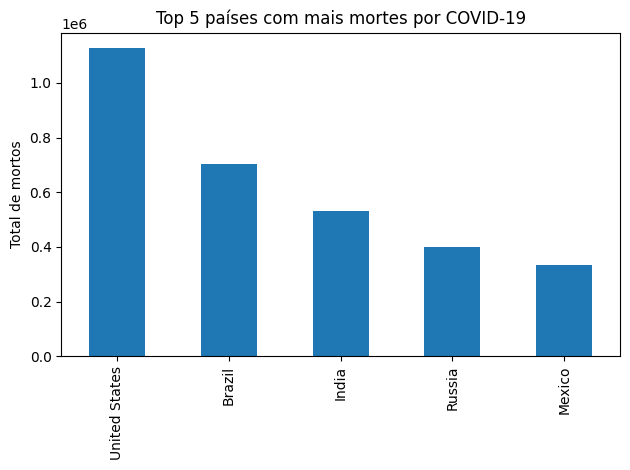

In [121]:
 #Plotar um gráfico de barras para os 5 países com mais mortes
fig,ax = plt.subplots()
df_top5 = df.loc[df.date == '2023-08-09'].sort_values(by="total_deaths", ascending=False)[9:14]
df_top5.plot(x = 'location', y='total_deaths',kind = 'bar', ax=ax)
ax.set_ylabel('Total de mortos')
ax.set_title('Top 5 países com mais mortes por COVID-19')
ax.set_xlabel('')
ax.get_legend().remove()
fig.tight_layout()


### Como o vírus progrediu durante a pandemia?

Uma das maiores preocupações das organizações de saúde foi a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

<Axes: title={'center': 'Total de mortes por COVID-19 ao redor do mundo'}, ylabel='Total de mortes'>

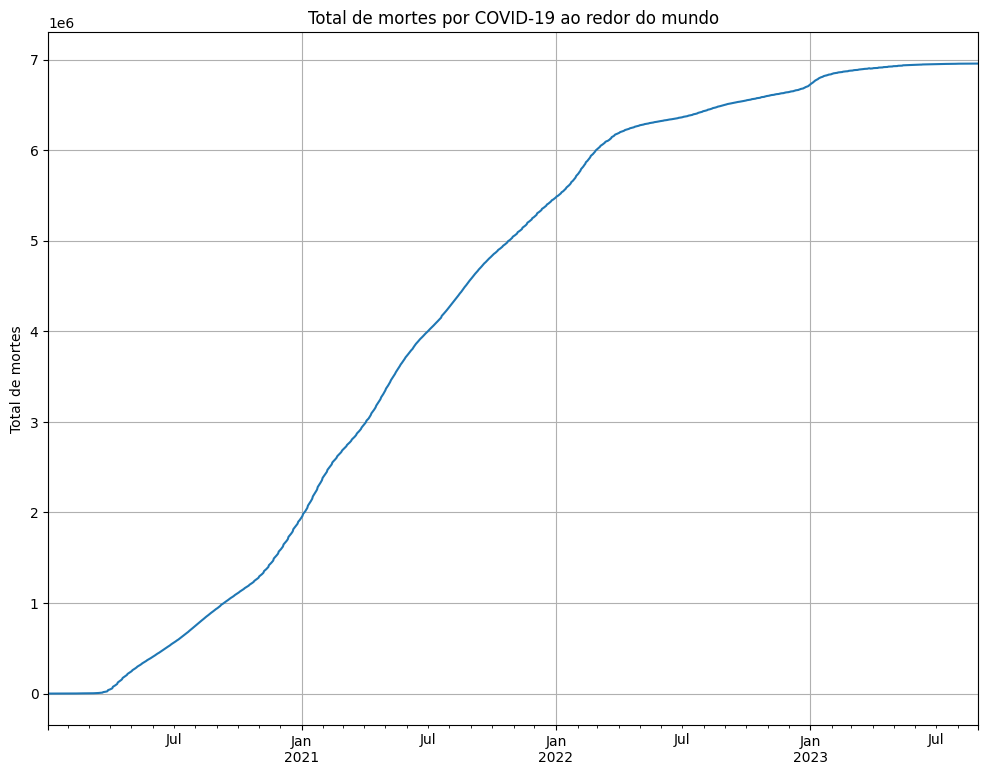

In [122]:
df_world = df.loc[df.location == "World"].sort_values(by='date')
df_world.plot(x='date', y='total_deaths', kind ='line',figsize=(12,9),xlabel='',grid=True, legend=False,ylabel = 'Total de mortes', title='Total de mortes por COVID-19 ao redor do mundo')

### Análise Exploratória para o Brasil

Agora que temos algumas noções sobre como se sucedeu pandemia ao redor do globo, vamos focar em analisar mais afundo como foi este periodo no contexto brasileiro.

Para isso vamos criar uma nova tabela derivada da anterior, mas apenas com valores que dizem respeito ao Brasil.

In [123]:
#Fazendo uma cópia do dataframe com dados apenas do Brasil
df = pd.read_csv(DATAPATH, parse_dates=True, index_col='date')
df_br = df.loc[df.location == "Brazil"].copy()

#Verificando o data frame
df_br.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
2020-01-04,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
2020-01-05,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
2020-01-06,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
2020-01-07,BRA,South America,Brazil,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


Vamos verificar quanto tempo se deu da detec~çao do primeor caso de COVID-19 até a primeira morte

In [124]:
#Identificando a data da primeira morte registrada no Brasil
df_br = df_br.fillna({'total_deaths':0})#Completando valores NaN na coluna "total_deaths" com 0
first_death = df_br.loc[df_br.total_deaths == 1].index #Data da primeira morte por COVID-19 registrada
print('Data da primeira morte por COVID-19 no Brasil: {}' .format(first_death))

Data da primeira morte por COVID-19 no Brasil: DatetimeIndex(['2020-03-19'], dtype='datetime64[ns]', name='date', freq=None)


In [125]:
#Identificando a data do primeiro caso registrado no Brasil
first_case = df_br.loc[df_br.total_cases == 1].index.min()
print('Data da identificação do primeiro caso: {}' .format(first_case))

Data da identificação do primeiro caso: 2020-02-27 00:00:00


In [126]:
#Identificando a quantidadde de dias decorridos entre a identificação do primeiro caso e a primeira morte
first_death = df_br.loc[df_br.total_deaths == 1].index
elapsed_time = first_death - first_case
print('Número de dias entre a primeira detecção da doença e a primeira morte: {}'.format(elapsed_time))

Número de dias entre a primeira detecção da doença e a primeira morte: TimedeltaIndex(['21 days'], dtype='timedelta64[ns]', name='date', freq=None)


A seguir, como feito anteriormente, vamos traçar os gráficos para ver como decorreram as mortes durante a pandemia no Brasil (em escala normal e logarítmica).

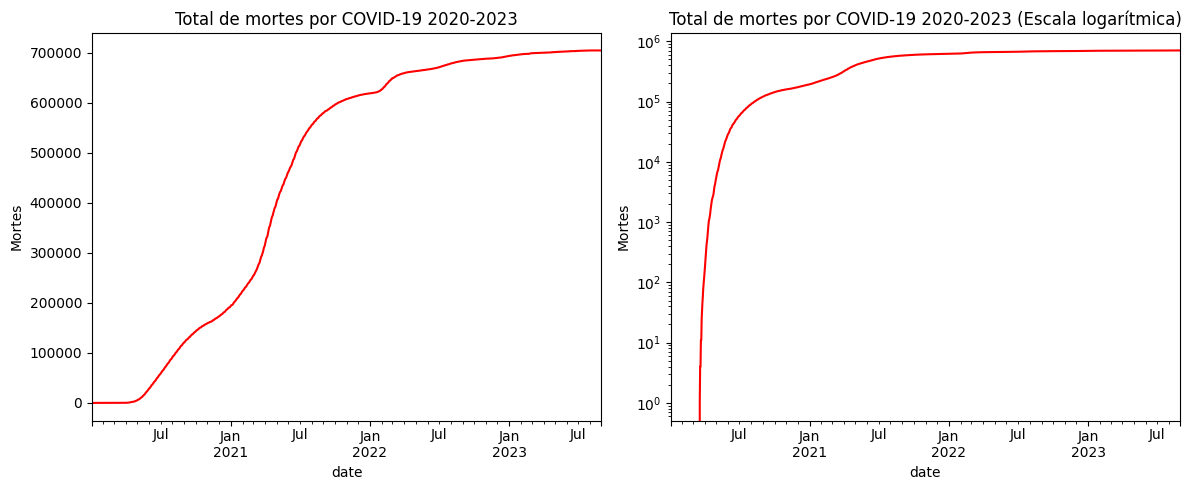

In [127]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.set_title('Total de mortes por COVID-19 2020-2023')
ax1.set_xlabel('Data')
ax1.set_ylabel('Mortes')
ax1.grid(True, linestyle='-', linewidth=0.5)
df_br.total_deaths.plot(kind='line', ax=ax1, color = 'r')

ax2.set_title('Total de mortes por COVID-19 2020-2023 (Escala logarítmica)')
ax2.set_xlabel('Data')
ax2.set_ylabel('Mortes')
ax2.grid(True, linestyle='-', linewidth=0.5)
ax2.set_yscale('log')
df_br.total_deaths.plot(kind='line', ax=ax2, color = 'r')

fig.tight_layout()
plt.show()
#Cade o grid?

Depois de ver o a sucessão das mortes no país vamos investigar sobre o efeito da vacina sobre a doença aqui no Brasil.

Então vasmos traçar um gráfico que sobrepõe dados da densidade de mortos pela densidade e densidade de aplicação de vacinas contra a COVID-19.

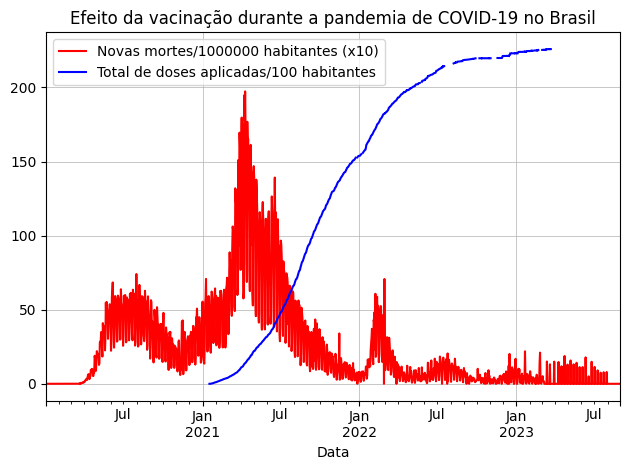

In [128]:
#Visualização do efeito da vacinação no Brasil
df_br['new_deaths_per_million_x10'] = df_br['new_deaths_per_million']*10
fig, ax = plt.subplots()
df_br.new_deaths_per_million_x10.plot(kind='line', ax=ax, color = 'r')
df_br.total_vaccinations_per_hundred.plot(kind='line', ax=ax, color = 'b')
ax.set_xlabel('Data')
ax.set_title('Efeito da vacinação durante a pandemia de COVID-19 no Brasil')
ax.legend(['Novas mortes/1000000 habitantes (x10)', 'Total de doses aplicadas/100 habitantes'])
ax.grid( linestyle='-', linewidth=0.5)
fig.tight_layout()

Vamos agora criar outro dataframe a partir dos dados do OpenDataSUS sobre ocupação hospitalar no ano de 2021

In [129]:
#gdown.download('https://drive.google.com/uc?id=1xmVmaNMi9UR7NzkQcxJSYGXevxNFIA5n', 'esus-vepi.LeitoOcupacao_2021.csv', quiet=False)
df_sus=pd.read_csv(gdown.download('https://drive.google.com/uc?id=1xmVmaNMi9UR7NzkQcxJSYGXevxNFIA5n', 'esus-vepi.LeitoOcupacao_2021.csv', quiet=False))
df_sus.insert(loc=1, column='data_notificacao', value=df_sus["dataNotificacao"].str[:10])
df_sus.data_notificacao = pd.to_datetime(df_sus.data_notificacao,format='%Y-%m-%d')
df_sus.head()

Downloading...
From: https://drive.google.com/uc?id=1xmVmaNMi9UR7NzkQcxJSYGXevxNFIA5n
To: /content/esus-vepi.LeitoOcupacao_2021.csv
100%|██████████| 167M/167M [00:02<00:00, 66.7MB/s]
<ipython-input-129-fd036c60924b>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sus=pd.read_csv(gdown.download('https://drive.google.com/uc?id=1xmVmaNMi9UR7NzkQcxJSYGXevxNFIA5n', 'esus-vepi.LeitoOcupacao_2021.csv', quiet=False))


,Unnamed: 0,data_notificacao,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,41848,2021-11-26,fXMWZc6pYx,2021-11-26T03:00:00.000Z,2796341.0,5.0,0.0,0.0,0.0,0.0,...,parse-cloud,_User$sDovugxgDt,Minas Gerais,Paraguaçu,Minas Gerais,Paraguaçu,False,False,2020-05-26T19:35:23.592Z,2021-11-26T18:10:30.964Z
1,41850,2021-01-19,0EqPcsxOrJ,2021-01-19T03:00:00.000Z,2796341.0,5.0,0.0,0.0,0.0,NaN,...,parse-cloud,_User$sDovugxgDt,Minas Gerais,Paraguaçu,Minas Gerais,Paraguaçu,False,False,2020-05-26T19:35:59.976Z,2021-01-20T12:40:18.030Z
2,49575,2021-01-27,8zTFrSB7ln,2021-01-27T21:00:00.000Z,9126597.0,11.0,0.0,4.0,0.0,NaN,...,parse-cloud,_User$SGlIuTEBrF,Rio de Janeiro,São Gonçalo,Rio de Janeiro,São Gonçalo,False,False,2020-06-01T14:55:50.697Z,2021-01-28T22:18:29.762Z
3,57550,2021-01-04,EGer1oZIdg,2021-01-04T03:00:00.000Z,2283239.0,0.0,9.0,0.0,9.0,NaN,...,parse-cloud,_User$x0Jh9W3F7R,Rio de Janeiro,Miguel Pereira,Rio de Janeiro,Miguel Pereira,False,False,2020-06-05T12:41:07.063Z,2021-01-05T13:11:40.490Z
4,66881,2021-01-07,HuLDbexxWM,2021-01-07T05:00:00.000Z,2001020.0,0.0,0.0,1.0,0.0,NaN,...,parse-cloud,_User$MMGEGP4sab,Acre,Assis Brasil,Acre,Assis Brasil,False,False,2020-06-11T23:55:49.995Z,2021-01-07T23:25:12.509Z


Assim como antes verificamos algumas informações relevantes para o dimensionamento do problema, como: Número de linhas e colunas, tipos de daos presentes, quantidade de valores não nulos e nome das colunas.

In [130]:
df_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745027 entries, 0 to 745026
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             745027 non-null  int64         
 1   data_notificacao       745027 non-null  datetime64[ns]
 2   _id                    745027 non-null  object        
 3   dataNotificacao        745027 non-null  object        
 4   cnes                   745027 non-null  object        
 5   ocupacaoSuspeitoCli    460677 non-null  float64       
 6   ocupacaoSuspeitoUti    460677 non-null  float64       
 7   ocupacaoConfirmadoCli  460677 non-null  float64       
 8   ocupacaoConfirmadoUti  460677 non-null  float64       
 9   ocupacaoCovidUti       291070 non-null  float64       
 10  ocupacaoCovidCli       291070 non-null  float64       
 11  ocupacaoHospitalarUti  291070 non-null  float64       
 12  ocupacaoHospitalarCli  291070 non-null  floa

A partir dai, verificamos a quantidade de valores ausentes sobre a variável de interesse, que nesse caso é a ocupação de UTIS por pacientes confirmadamente com COVID-19.

In [131]:
#Verificando a porcentagem de valores ausentes da ocupacao dos leitos de UTI por pacientes confirmadamente com COVID-19
vals_aus = round((df_sus.isnull().sum()/df_sus.shape[0]).sort_values(ascending=False).ocupacaoConfirmadoUti , 2)
print('Porcentagem de valores inexistentes: {} ' .format(vals_aus))

Porcentagem de valores inexistentes: 0.38 


Observando que nao temos 38% dos valores da variável de interesse são ausentes, verificamos agora a existência de índices repetidos.

In [132]:
#Verificando a nao existencia de indicies repetidos
df_sus = df_sus.drop('dataNotificacao', axis = 1 )
idx_unc = df_sus.index.value_counts().sum()
print('Número de linhas com indicies uncicos: {}' .format(idx_unc))
print('Número total de linhas: {}' .format(df_sus.shape[0]))

Número de linhas com indicies uncicos: 745027
Número total de linhas: 745027


Para seguir com a análise, vamos criar um novo dataframe vazio para aglomerar os valores da variável de interesse por data(estavam distinguidos por lugar).

In [133]:
#Criando um novo dataframe para separar os dados de ocupacao dos leitos de UTI por pacientes confirmadamente com COVID-19 por data
df_sus_bydate = pd.DataFrame()
df_sus_bydate['data'] = []
df_sus_bydate['ocupacao'] = []

In [134]:
while df_sus.shape[0] > 0:
  prim_idx =df_sus.index[0]
  data = df_sus.data_notificacao[prim_idx]
  soma = df_sus.loc[df_sus.data_notificacao == df_sus.data_notificacao[df_sus.index[0]]].ocupacaoCovidUti.sum()
  nova_linha = pd.DataFrame({'data': [data],'ocupacao':[soma]})
  df_sus_bydate = pd.concat([df_sus_bydate, nova_linha], ignore_index=True)
  df_sus = df_sus[df_sus['data_notificacao'] != df_sus.data_notificacao[prim_idx]]


Verificamos agora o tamanho do dataframe (365 dias = 1 ano) bem como suas 5 primeiras e últimas entradas para verificar o ordenamento por data.

In [135]:
#Verificando o tamanho do array para confirmar que a o dataframe "df_sus_bydate" faz sentido (365 dias = 1 ano)
print('Número total de colunas: {}' .format(df_sus_bydate.shape[1]))
print('Número total de linhas: {}' .format(df_sus_bydate.shape[0]))

Número total de colunas: 2
Número total de linhas: 365


In [136]:
#Verificando o ordenamento por data
df_sus_bydate = df_sus_bydate.sort_values(by = 'data', ascending=True)
df_sus_bydate.head()


,data,ocupacao
13,2021-01-01,61.0
14,2021-01-02,73.0
11,2021-01-03,61.0
3,2021-01-04,40.0
17,2021-01-05,40.0


In [137]:
#Verificando o ordenamento por data
df_sus_bydate.tail()

,data,ocupacao
360,2021-12-27,2352.0
361,2021-12-28,2471.0
362,2021-12-29,2473.0
363,2021-12-30,2536.0
364,2021-12-31,2289.0


Definimos as datas como índice do nosso novo dataframe para faciltar na hora de plotar o gráfico.

In [138]:
#Definindo a data como indicie
df_sus_bydate = df_sus_bydate.set_index('data')
df_sus_bydate.head()

,ocupacao
data,
2021-01-01,61.0
2021-01-02,73.0
2021-01-03,61.0
2021-01-04,40.0
2021-01-05,40.0


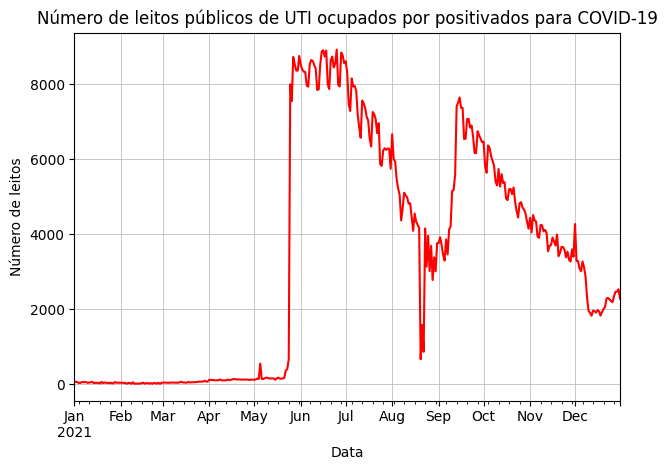

In [139]:
fig, ax = plt.subplots()
df_sus_bydate.ocupacao.plot(kind='line', ax=ax, color = 'r')
ax.set_ylabel('Número de leitos')
ax.set_xlabel('Data')
ax.set_title('Número de leitos públicos de UTI ocupados por positivados para COVID-19')
ax.grid( linestyle='-', linewidth=0.5)
fig.tight_layout()

Agora, iremos explorar uma segunda fonte de dados sobre os leitos(CNS) durante a pandemia, para isso criaremos um novo dataframe.

In [140]:
df_sus_leitos = pd.read_csv('https://drive.google.com/uc?id=15SJEy5ha62KHInLJ2pubMLUfye_Gy_UR')
df_sus_leitos.head()

,Ano,Mês,Região,UF,Município,CNES,Estabelecimento,Número da portaria,Visualização da portaria,Tipo de portaria,Tipo de leito,Quantidade,Leitos valor total (R$),Observações
0,2020,Abr,Nordeste,PE,Arcoverde,2551764,HOSPITAL REGIONAL RUI DE BARROS CORREIA,1.011/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,5,"720.000,00",-
1,2020,Abr,Nordeste,PE,Cabo de Santo Agostinho,6559379,HOSPITAL DOM HELDER CAMARA,1.011/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,30,"4.320.000,00",-
2,2020,Abr,Nordeste,PE,Caruaru,7498810,HOSPITAL MESTRE VITALINO,1.011/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,20,"2.880.000,00",-
3,2020,Abr,Nordeste,PE,Olinda,2344858,MATERNIDADE BRITES DE ALBUQUERQUE,1.011/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,10,"1.440.000,00",-
4,2020,Abr,Nordeste,PE,Paulista,5707234,HOSPITAL NOSSA SENHORA DO O PAULISTA,1.011/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,18,"2.592.000,00",-


Como antes, usamos a função `.info()` para termos o panorama da tabela

In [141]:
df_sus_leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14927 entries, 0 to 14926
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Ano                       14927 non-null  int64 
 1   Mês                       14927 non-null  object
 2   Região                    14927 non-null  object
 3   UF                        14927 non-null  object
 4   Município                 14927 non-null  object
 5   CNES                      14927 non-null  int64 
 6   Estabelecimento           14927 non-null  object
 7   Número da portaria        14927 non-null  object
 8   Visualização da portaria  14927 non-null  object
 9   Tipo de portaria          14927 non-null  object
 10  Tipo de leito             14927 non-null  object
 11  Quantidade                14927 non-null  int64 
 12  Leitos valor total (R$)   14927 non-null  object
 13  Observações               14927 non-null  object
dtypes: int64(3), object(11

Nossa variável de interesse é a quantidade de leitos ocuapdos, por isso removeremos do dataframe todas as colunas irrelevantes para nossa análise.

In [142]:
#Excluindo colunas que são irrelevantes para a analise desejada
df_sus_leitos = df_sus_leitos.drop(['Região','UF','Município','CNES','Estabelecimento','Número da portaria','Visualização da portaria','Tipo de portaria','Leitos valor total (R$)','Observações'], axis = 1)
df_sus_leitos.head()

,Ano,Mês,Tipo de leito,Quantidade
0,2020,Abr,UTI Adulto,5
1,2020,Abr,UTI Adulto,30
2,2020,Abr,UTI Adulto,20
3,2020,Abr,UTI Adulto,10
4,2020,Abr,UTI Adulto,18


Destacando aqui um ponto que chamou atenção, onde, em todo o mes de janeiro de 2021 temos apenas um registro em uma localidade do país que mostra a desocupação de 10 leitos em um hospital (representada pelo sinal negativo).

Isso passa a impressão de que os dados do mes de janeiro foram adicionados à tabela de maneira incompleta.


In [143]:
#Verificando que nao temos dados de Jan e Fev de 2021
filtro = (df_sus_leitos['Ano'] == 2021) & ((df_sus_leitos['Mês'] == 'Fev') | (df_sus_leitos['Mês'] == 'Jan'))
df_sus_leitos.loc[filtro]

,Ano,Mês,Tipo de leito,Quantidade
12224,2021,Jan,UTI Adulto,-10


In [144]:
#Verificando algumas informações deste dataframe
df_sus_leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14927 entries, 0 to 14926
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ano            14927 non-null  int64 
 1   Mês            14927 non-null  object
 2   Tipo de leito  14927 non-null  object
 3   Quantidade     14927 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 466.6+ KB


Aqui podemos ver que temos apenas dados sobre UTI, porém nao faremos distinção entre UTIs pediátricas e adultas, por isso removeremos a coluna "Tipo de leito" da nossa tabela.

In [145]:
#Data frame só cobtabiliza os leitos de UTI(pediátricos e adultos nao serão distinguidos)
df_sus_leitos['Tipo de leito'].value_counts()


UTI Adulto        14349
UTI Pediátrico      578
Name: Tipo de leito, dtype: int64

In [146]:
#Removendo informações sobre tipos de leito
df_sus_leitos = df_sus_leitos.drop(['Tipo de leito'], axis=1)

Aqui temos outro ponto de atenção, onde podemos observar que nao há nenhum registro na tabela sobre o mês de fevereiro.

In [147]:
#Verificando que nao temos dados dos meses de Fevereiro
df_sus_leitos['Mês'].value_counts()

Dez    2880
Mai    2333
Set    1609
Out    1545
Ago    1525
Nov    1433
Jun    1424
Mar    1165
Abr     683
Jul     215
Jan     115
Name: Mês, dtype: int64

Da mesma maneira como antes, nosso dataframe(registro) nao possui critério de separação, por isso iremos organiza-lo por data.

Para isso criaremos um novo dataframe e o preencheremos com informações advindas da tabela fornecida pelo CNS.

In [148]:
#Criando novo dataframe para agrupar a quantidade de leitos por data (ano e mes)
df_let_date = pd.DataFrame()
df_let_date['Ano'] = []
df_let_date['Mês'] = []
df_let_date['Saldo_Ocupação'] = []

In [149]:
#Agrupando quantiidade de leitos por data (ano e mes)
while df_sus_leitos.shape[0] > 0:
  prim_idx = df_sus_leitos.index[0]
  ano = df_sus_leitos.Ano[prim_idx]
  mes = df_sus_leitos['Mês'][prim_idx]
  filtro = (df_sus_leitos['Ano'] == df_sus_leitos['Ano'][prim_idx]) & (df_sus_leitos['Mês'] == df_sus_leitos['Mês'][prim_idx])
  soma = df_sus_leitos.loc[filtro].Quantidade.sum()
  nova_linha = pd.DataFrame({'Ano': [ano],'Mês':[mes], 'Saldo_Ocupação':[soma]})
  df_let_date = pd.concat([df_let_date, nova_linha], ignore_index=True)
  filtro = (df_sus_leitos['Ano'] != df_sus_leitos['Ano'][prim_idx]) | (df_sus_leitos['Mês'] != df_sus_leitos['Mês'][prim_idx])
  df_sus_leitos = df_sus_leitos[filtro]

df_let_date

,Ano,Mês,Saldo_Ocupação
0,2020.0,Abr,2637.0
1,2021.0,Mai,1940.0
2,2020.0,Mai,4804.0
3,2021.0,Jun,1552.0
4,2020.0,Jun,1529.0
5,2021.0,Jul,-136.0
6,2020.0,Jul,2442.0
7,2021.0,Ago,22.0
8,2020.0,Ago,4466.0
9,2021.0,Set,-2458.0


Agora que montamos um dataframe com o saldo de ocupação das UTIs, verificaremos algumas informações sobre o dataframe.

In [150]:
df_let_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             21 non-null     float64
 1   Mês             21 non-null     object 
 2   Saldo_Ocupação  21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 632.0+ bytes


Apesar de termos separado o saldo de ocupação dos leitos, os anos e meses estão em colunas separadas, por isso desejamos condesar essas informações em uma só variável do tipo *datetime*.

In [151]:
#Mudando o tipo tipo de dado dos valores da coluna "Ano" para inteiro
df_let_date['Ano'] = df_let_date['Ano'].astype(int)

In [152]:
#Mapa para auxiliar na criação da coluna com valores de data no formato correto(date time)
meses_mapa = {'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6,
             'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12}


In [153]:
# Função para criar datetime a partir de Ano e Mês
def criar_data(row):
    mes_numero = meses_mapa[row['Mês']]
    return pd.Timestamp(year=row['Ano'], month=mes_numero, day=1,)

# Aplicar a função para criar nova coluna 'Data'
df_let_date['Data'] = df_let_date.apply(criar_data, axis=1)

#Verificando a mudança no dataframe
df_let_date.head()

,Ano,Mês,Saldo_Ocupação,Data
0,2020,Abr,2637.0,2020-04-01
1,2021,Mai,1940.0,2021-05-01
2,2020,Mai,4804.0,2020-05-01
3,2021,Jun,1552.0,2021-06-01
4,2020,Jun,1529.0,2020-06-01


Tendo condensado as datas com sucesso, podemos ver as informações deste dataframe e finalmente excluir as linhas de ano e mês.

Usaremos as informações deste dataframe um pouco mais a frente dda análise.

In [154]:
df_let_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ano             21 non-null     int64         
 1   Mês             21 non-null     object        
 2   Saldo_Ocupação  21 non-null     float64       
 3   Data            21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 800.0+ bytes


In [155]:
#Finalmente apagando as colunas que nao serão mais usadas e ordenanado o dataframe por data
df_let_date = df_let_date.drop(['Ano','Mês'], axis = 1)
df_let_date = df_let_date.sort_values(by="Data", ascending=True)
df_let_date.head()

,Saldo_Ocupação,Data
0,2637.0,2020-04-01
2,4804.0,2020-05-01
4,1529.0,2020-06-01
6,2442.0,2020-07-01
8,4466.0,2020-08-01


O ultimo dataframe que usaremos para nossa análise contem os dados do vacinômetro disponibilizado também pelo CNS.

Como antes, criaremos um dataframe com estes dados e extrairemoas suas informações gerais(com a função `.info()`) bem como a quantidade de valores vazios que a tabela possui.

In [156]:
#Criando Dataframe dos dados de vacinação do DataSUS
df_sus_vac = pd.read_csv('https://drive.google.com/uc?id=1l1BUcld_34go7RfUddPxVDuiCgW16KZl')
df_sus_vac.head()

,Data da Vacina,Total de Doses Aplicadas
0,17/01/2021,42.834
1,18/01/2021,3.207
2,19/01/2021,62.682
3,20/01/2021,350.253
4,21/01/2021,394.572


In [157]:
#Verificando informações do dataframe
df_sus_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data da Vacina            943 non-null    object
 1   Total de Doses Aplicadas  943 non-null    object
dtypes: object(2)
memory usage: 14.9+ KB


In [158]:
#Verificando a quantidade de valores ausentes
df_sus_vac.isnull().sum()

Data da Vacina              0
Total de Doses Aplicadas    0
dtype: int64

Podemos observar que nem as datas e nem a quantidade de doses estão no fomrato adequado(são do tipo *object*), por isso vamos transfoma-las em *datetime* e *int* respectivamente.

In [159]:
#Convertendo os valores da coluna "Data" para datetime e 'Total de Doses Aplicadas' para inteiro
df_sus_vac['Data da Vacina'] = pd.to_datetime(df_sus_vac['Data da Vacina'],format='%d/%m/%Y')
df_sus_vac['Total de Doses Aplicadas'] = df_sus_vac['Total de Doses Aplicadas'].str.replace('.', '') #removendo os caracteres de ponto para substituir as strings por inteiros
df_sus_vac['Total de Doses Aplicadas'] = df_sus_vac['Total de Doses Aplicadas'].astype(int)
df_sus_vac = df_sus_vac.sort_values(by='Data da Vacina')
df_sus_vac.dtypes

<ipython-input-159-f7f6ca281379>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sus_vac['Total de Doses Aplicadas'] = df_sus_vac['Total de Doses Aplicadas'].str.replace('.', '') #removendo os caracteres de ponto para substituir as strings por inteiros


Data da Vacina              datetime64[ns]
Total de Doses Aplicadas             int64
dtype: object

Agora, para melhor visualização dos dados, vamos condensar as informações da quantidade de doses aplicadas em períodos mensais em um novo dataframe.

In [160]:
#Separação das doses aplicadas por mes para uma melhor visualização
df_vac_mon=pd.DataFrame()
df_vac_mon['data'] = []
df_vac_mon['doses_aplicadas'] = []
df_prov = df_sus_vac.copy()

In [161]:
df_prov = df_sus_vac.copy()

while df_prov.shape[0] > 0:
  prim_idx = df_prov.index[0]
  ano = df_prov['Data da Vacina'].dt.year[prim_idx]
  mes = df_prov['Data da Vacina'].dt.month[prim_idx]
  filtro = (df_prov['Data da Vacina'].dt.year == ano) & (df_prov['Data da Vacina'].dt.month == mes)
  soma = df_prov.loc[filtro]['Total de Doses Aplicadas'].sum()
  nova_linha = pd.DataFrame({'data': pd.Timestamp(year=ano, month=mes, day=1,), 'doses_aplicadas':[soma]})
  df_vac_mon = pd.concat([df_vac_mon, nova_linha], ignore_index=True)
  filtro = (df_prov['Data da Vacina'].dt.year != ano) | (df_prov['Data da Vacina'].dt.month != mes)
  df_prov = df_prov[filtro]


Assim, podemos verificar como ficou o dataframe após as alerações e ordenado por data.

In [162]:
df_vac_mon.sort_values(by='data', ascending=True)
df_vac_mon.head()

,data,doses_aplicadas
0,2021-01-01,2892572.0
1,2021-02-01,6973633.0
2,2021-03-01,17367736.0
3,2021-04-01,24111414.0
4,2021-05-01,21970601.0


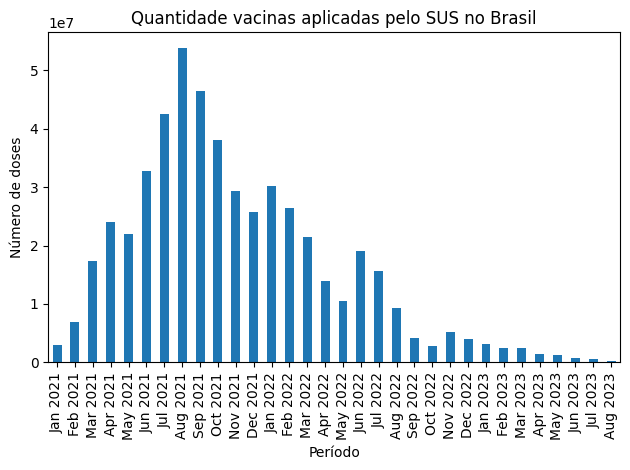

In [163]:
fig,ax = plt.subplots()
df_vac_mon.plot(x = 'data', y='doses_aplicadas',kind = 'bar', ax=ax)
ax.set_xticklabels(df_vac_mon['data'].dt.strftime('%b %Y'))
ax.get_legend().remove()
ax.set_ylabel('Número de doses')
ax.set_xlabel('Período')
ax.set_title('Quantidade vacinas aplicadas pelo SUS no Brasil')
fig.tight_layout()
plt.show()

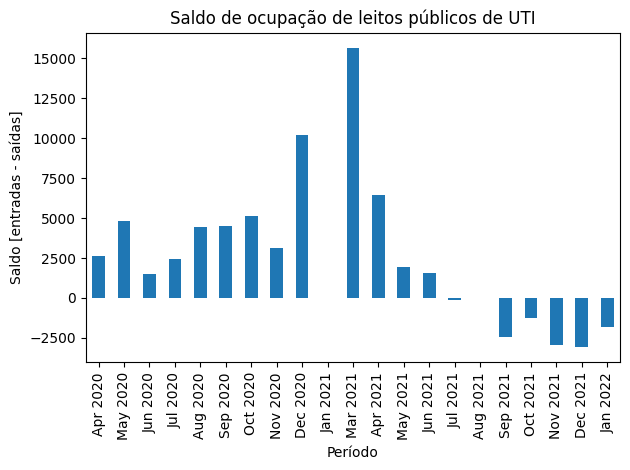

In [164]:
fig,ax = plt.subplots()
df_let_date.plot(x = 'Data', y='Saldo_Ocupação',kind = 'bar', ax=ax)
ax.set_xticklabels(df_let_date['Data'].dt.strftime('%b %Y'))
ax.get_legend().remove()
ax.set_ylabel('Saldo [entradas - saídas]')
ax.set_xlabel('Período')
ax.set_title('Saldo de ocupação de leitos públicos de UTI')
fig.tight_layout()
plt.show()

Aqui aplicamos um filtro nos *dataframes* para fazer um traçado dos dois gráficos no mesmo período.

In [165]:
filtro = (df_vac_mon['data'] <= '2022-01-01')
df_vac_mon = df_vac_mon.loc[filtro]

filtro2 = (df_let_date['Data'] >= '2021-01-01')
df_let_date = df_let_date.loc[filtro2]

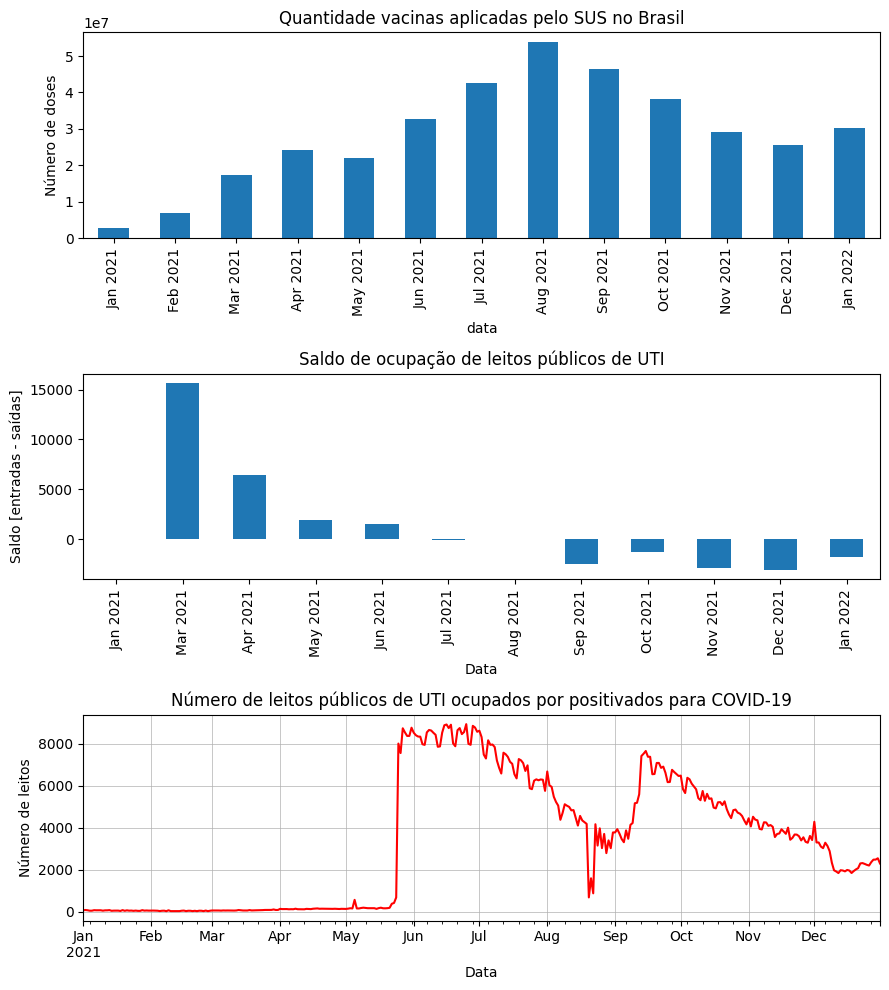

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(9, 10))

ax1.set_title('Quantidade vacinas aplicadas pelo SUS no Brasil')
ax1.set_xlabel('Período')
ax1.set_ylabel('Número de doses')
df_vac_mon.plot(x = 'data', y='doses_aplicadas',kind = 'bar', ax=ax1)
ax1.set_xticklabels(df_vac_mon['data'].dt.strftime('%b %Y'))
ax1.get_legend().remove()


ax2.set_title('Saldo de ocupação de leitos públicos de UTI')
ax2.set_xlabel('Período')
ax2.set_ylabel('Saldo [entradas - saídas]')
df_let_date.plot(x = 'Data', y='Saldo_Ocupação',kind = 'bar', ax=ax2)
ax2.set_xticklabels(df_let_date['Data'].dt.strftime('%b %Y'))
ax2.get_legend().remove()

df_sus_bydate.ocupacao.plot(kind='line', ax=ax3, color = 'r')
ax3.set_ylabel('Número de leitos')
ax3.set_xlabel('Data')
ax3.set_title('Número de leitos públicos de UTI ocupados por positivados para COVID-19')
ax3.grid( linestyle='-', linewidth=0.5)



fig.tight_layout()
plt.show()

## Conclusão

Após o trabalho que foi realizado encima dos dados, pudemos perceber que em relação ao resto do mundo, nosso país configurta entre os 6 países que possuem maior saldo no que diz respeito as mortes por COVID-19.

 Entretanto, é interessante observar que se o intuito é concluir sobre a gestão da pandemia nos países, seria mais interessante levar em consideraçao a densidade de mortes, já que se espera que mais pessoas morrem em países que tem uma maior população em seu território.

Também pudemos observar que, principalmente em 2021, a doença teve um crescimento assustador, não só no Brasil, mas no mundo inteiro. O ano de 2021 foi o período de maio crescimento de mortes pelo vírus.

A respeito da vacinação no Brasil e, provavelmente no resto dos países que ultilizaram as mesmas vacinas, pudemos concluir que estas de fato surtiram os efeitos esperados sobre o vírus.

Embora em alguns pontos da análise tenhamos dados do governo que são contraditórios, de uma forma geral observamos que a medida em que há um aumento no numero de doses administradas na população, o o saldo de pacientes positivados para COVID-19 nas UTIs não só cai como se torna negativo(mais pessoas saem doque entram) e por consequência o número absoluto de leitos ocupados por estes pacientes cai significativamente em 2021.

Além disso, com os dados da OWID, fica evidenciado que a densidade de novas mortes por COVID-19 cai conforme a densidade de doses aplicadas aumenta, oque reforça a atenuação sofrida pelo vírus a partir das vacinas contra COVID-19 que foram administradas.